In [1]:
!pip install xgboost

# IMPORTING THE DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# DATA COLLECTION & ANALYSIS

### <>LOADING THE DATASET FROM CSV FILE TO PANDAS DATAFRAME

In [3]:
import os
print(os.path.exists(r"C:\Users\chint\OneDrive\Desktop\blinkit\blinkit_grocery.xlsx"))

True


In [4]:
import pandas as pd
dataset = pd.read_excel(r"C:\Users\chint\OneDrive\Desktop\blinkit\blinkit_grocery.xlsx")

### <>FIRST FIVE ROWS OF THE DATAFRAME

In [5]:
dataset.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### <> NO. OF ROWS & COLUMNS

In [6]:
dataset.shape

(8523, 12)

### <> INFO OF DATASET

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# CATEGORICAL VALUES
 -Item Fat Content
 -Item Identifier
 -Item Type
 -Outlet Identifier
 -Outlet Location Type
 -Outlet Size
 -Outlet Type

### <> MISSING VALUES

In [8]:
dataset.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

### <> FILLING UP NULL VALUES 

In [9]:
dataset['Item Weight'].mean()

12.857645184135977

In [10]:
dataset.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [11]:
dataset.loc[:, 'Item Weight'] = dataset['Item Weight'].fillna(dataset['Item Weight'].mean())


In [12]:
dataset.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

# DATA ANALYSIS

### <> STATISTICAL MEASURES ABOUT THE DATA

In [13]:
dataset.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.226124,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,9.310000,93.826500,4.000000
50%,2016.000000,0.053931,12.857645,143.012800,4.000000
75%,2018.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### <> NUMERICAL FEATURES

In [14]:
sns.set()

##### : ITEM WEIGHT DISTRIBUTION

C:\Users\chint\AppData\Local\Temp\ipykernel_7152\1145137167.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item Weight'])


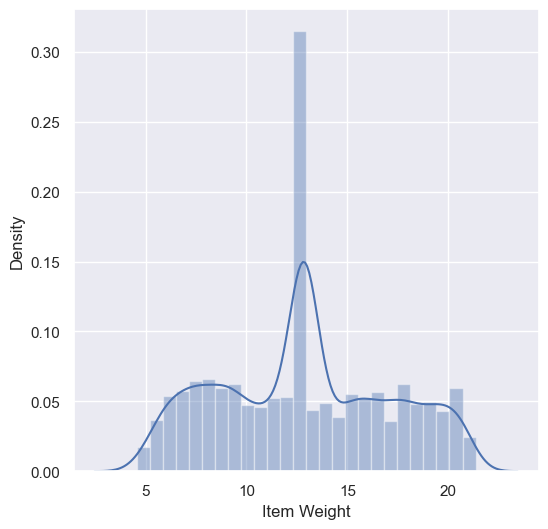

In [15]:
plt.figure(figsize = (6,6))
sns.distplot(dataset['Item Weight'])
plt.show()

##### :ITEM VISIBILITY DISTRIBUTION

C:\Users\chint\AppData\Local\Temp\ipykernel_7152\1623666445.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item Visibility'])


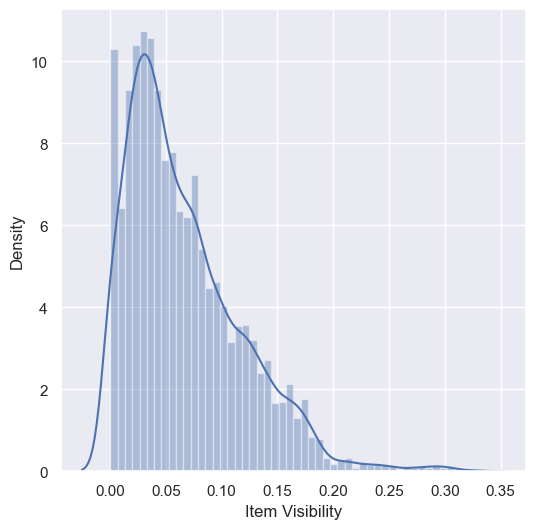

In [16]:
plt.figure(figsize = (6,6))
sns.distplot(dataset['Item Visibility'])
plt.show()

##### :SALES DISTRIBUTION

C:\Users\chint\AppData\Local\Temp\ipykernel_7152\4171150530.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales'])


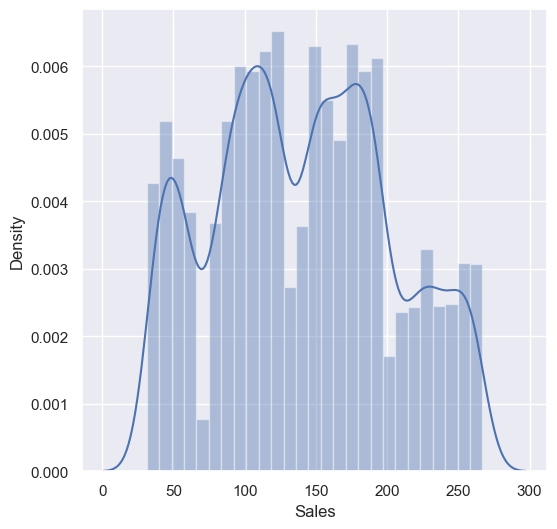

In [17]:
plt.figure(figsize = (6,6))
sns.distplot(dataset['Sales'])
plt.show()

##### :RATING DISTRIBUTION

C:\Users\chint\AppData\Local\Temp\ipykernel_7152\2328385111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rating'])


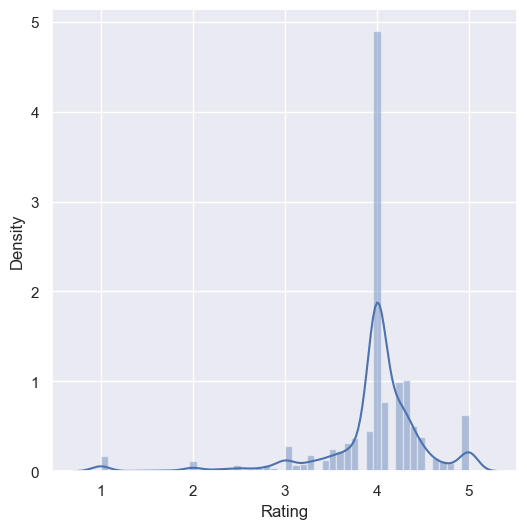

In [18]:
plt.figure(figsize = (6,6))
sns.distplot(dataset['Rating'])
plt.show()

# DATA PRE-PROCESSING

In [19]:
dataset.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [20]:
dataset['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [21]:
dataset.replace({'Item Fat Content' : {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [22]:
dataset['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### <> LABEL ENCODING

In [23]:
encoder = LabelEncoder()

In [24]:
dataset['Item Fat Content'] = encoder.fit_transform(dataset['Item Fat Content'])

dataset['Item Identifier'] = encoder.fit_transform(dataset['Item Identifier'])

dataset['Item Type'] = encoder.fit_transform(dataset['Item Type'])

dataset['Outlet Identifier'] = encoder.fit_transform(dataset['Outlet Identifier'])

dataset['Outlet Location Type'] = encoder.fit_transform(dataset['Outlet Location Type'])

dataset['Outlet Size'] = encoder.fit_transform(dataset['Outlet Size'])

dataset['Outlet Type'] = encoder.fit_transform(dataset['Outlet Type'])                                                   

In [25]:
dataset.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,1,1142,6,2012,9,0,1,1,0.100014,15.10,145.4786,5.0
1,0,1280,8,2022,3,2,1,2,0.008596,11.80,115.3492,5.0
2,1,843,5,2016,8,0,2,1,0.025896,13.85,165.0210,5.0
3,1,611,3,2014,1,2,0,1,0.042278,12.15,126.5046,5.0
4,0,82,14,2015,7,1,2,1,0.033970,19.60,55.1614,5.0


### SPLITTING FEATURES & TARGETS

In [26]:
X = dataset.drop(columns = 'Sales', axis = 1)
Y = dataset['Sales']

In [27]:
print(X)

      Item Fat Content  Item Identifier  Item Type  Outlet Establishment Year  \
0                    1             1142          6                       2012   
1                    0             1280          8                       2022   
2                    1              843          5                       2016   
3                    1              611          3                       2014   
4                    0               82         14                       2015   
...                ...              ...        ...                        ...   
8518                 0             1497          8                       2018   
8519                 0              658         13                       2018   
8520                 0               29         14                       2018   
8521                 1              958          4                       2018   
8522                 1              651         13                       2018   

      Outlet Identifier  Ou

In [28]:
print(Y)

0       145.4786
1       115.3492
2       165.0210
3       126.5046
4        55.1614
          ...   
8518    164.5526
8519    241.6828
8520     86.6198
8521     97.8752
8522    112.2544
Name: Sales, Length: 8523, dtype: float64


# TRAINING & TESTING DATA

### <> SPLITTING DATA INTO TRAINING DATA & TESTING DATA

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


### <> MACHINE LEARNING MODEL TRAINING

### <> XGBOOST REGRESSOR

In [31]:
regressor = XGBRegressor()

In [32]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# EVALUATION

In [33]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [34]:
# R Squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [35]:
print("R Squared Value = ", r2_train)

R Squared Value =  0.8837555728677774


In [36]:
# prediction on testing data
testing_data_prediction = regressor.predict(X_test)

In [37]:
# R Squared Value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)

In [38]:
print("R Squared Value = ", r2_test)

R Squared Value =  0.6753841233969886
